In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
headers = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, nrows=0).columns[1:]
results = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(results)

,ImpactParameter,S_AB,Stderr(S_AB)
0,0.00,0.844443,0.000014
1,0.01,0.844447,0.000017
2,0.02,0.844482,0.000018
3,0.03,0.844476,0.000019
4,0.04,0.844501,0.000018
...,...,...,...
995,9.95,1.000000,0.000000
996,9.96,1.000000,0.000000
997,9.97,1.000000,0.000000
998,9.98,1.000000,0.000000


In [116]:
b = np.array(results['ImpactParameter'])
S_AB = np.array(results['S_AB'])

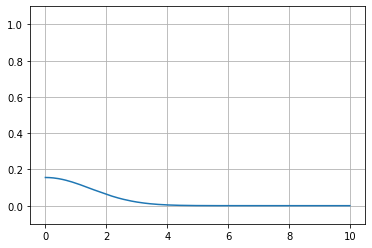

In [117]:
fig, ax = plt.subplots()

ax.plot(b, (1 - S_AB))

ax.grid()
ax.set_ylim(-0.1, 1.1)

plt.show()

In [118]:
S_AB[0]

0.844443

In [124]:
sigma_tot = 10 * 4 * np.pi * np.sum(np.convolve((1 - S_AB) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_tot, "mb")

42.999113926663156 mb


In [125]:
sigma_el = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB) ** 2 * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_el, "mb")

1.6719907578493796 mb


In [126]:
sigma_reac = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB ** 2) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_reac, "mb")

41.327123168813785 mb
